This dataset is download from https://zenodo.org/record/3757476#.Xpz8OcgzZPY

In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

/storage/ducpm/lung-segmentation


In [2]:
import nibabel as nib
import numpy as np
from torch.utils.data import DataLoader

from src.data import Covid19Dataset
from src.visualization import plot_batch

In [ ]:
ct_file = nib.load("data/raw/COVID-19-CT-Seg_20cases/ct_scans/coronacases_001.nii.gz")
ct_arr = ct_file.get_fdata()
mask_file = nib.load("data/raw/COVID-19-CT-Seg_20cases/lung_masks/coronacases_001.nii.gz")
mask_arr = mask_file.get_fdata()

In [9]:
mask_arr[mask_arr > 0] = 1
mask_arr = mask_arr.astype(np.int64)

In [10]:
ct_arr = ct_arr.transpose(2, 0, 1)
mask_arr = mask_arr.transpose(2, 0, 1)

In [11]:
for arr in [ct_arr, mask_arr]:
    print(arr.shape, arr.dtype)

(301, 512, 512) float64
(301, 512, 512) int64


In [15]:
ds = Covid19Dataset(ct_dir="data/raw/COVID-19-CT-Seg_20cases/ct_scans/",
                    mask_dir="data/raw/COVID-19-CT-Seg_20cases/lung_masks/")

In [4]:
ds[1];
%timeit ds[1];

399 µs ± 41.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
img, mask = ds[1]["img"], ds[1]["mask"]
img.strides, mask.strides

((1048576, 2048, 4), (4096, 8))

In [10]:
arr =ds.load_nifti_arr("data/raw/COVID-19-CT-Seg_20cases/ct_scans/coronacases_001.nii.gz")

In [12]:
arr.strides, np.ascontiguousarray(arr).strides

((4, -1204, 616448), (1048576, 2048, 4))

In [19]:
loader = DataLoader(ds, batch_size=16, shuffle=False)
loader_it = iter(loader)
for _ in range(20):
    batch = next(loader_it)
batch['img'].shape

torch.Size([16, 1, 512, 512])

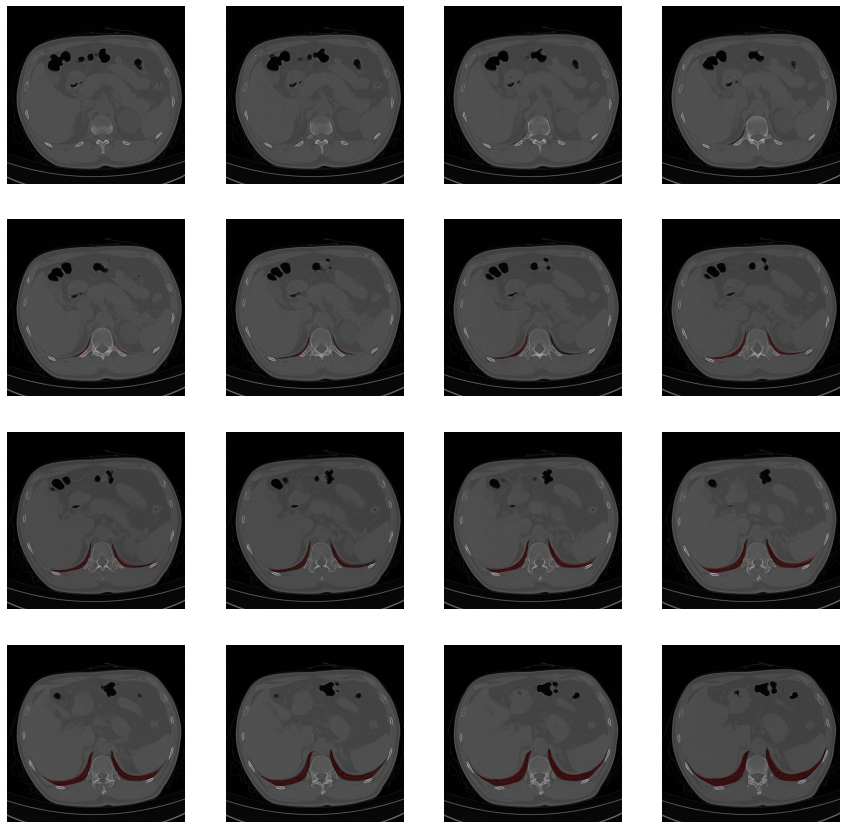

In [20]:
plot_batch(batch["img"], batch["mask"], nrows=4, ncols=4)

In [44]:
imgs = ds.load_nifti_arr("data/raw/COVID-19-CT-Seg_20cases/ct_scans/coronacases_001.nii.gz")

In [49]:
mask_file = nib.load("data/raw/COVID-19-CT-Seg_20cases/ct_scans//coronacases_001.nii.gz")
mask_arr = mask_file.get_fdata()
mask_arr.shape, mask_arr.strides

((512, 512, 301), (8, 4096, 2097152))

In [45]:
ds.metadata.head()

,slice_idx,ct_id,img_path,mask_path
0,0,coronacases_001,data/raw/COVID-19-CT-Seg_20cases/ct_scans/coro...,data/raw/COVID-19-CT-Seg_20cases/lung_masks/co...
1,1,coronacases_001,data/raw/COVID-19-CT-Seg_20cases/ct_scans/coro...,data/raw/COVID-19-CT-Seg_20cases/lung_masks/co...
2,2,coronacases_001,data/raw/COVID-19-CT-Seg_20cases/ct_scans/coro...,data/raw/COVID-19-CT-Seg_20cases/lung_masks/co...
3,3,coronacases_001,data/raw/COVID-19-CT-Seg_20cases/ct_scans/coro...,data/raw/COVID-19-CT-Seg_20cases/lung_masks/co...
4,4,coronacases_001,data/raw/COVID-19-CT-Seg_20cases/ct_scans/coro...,data/raw/COVID-19-CT-Seg_20cases/lung_masks/co...


(8, 4096, 2097152)